## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [218]:
X.info()
print("Пропущенных и категориальных значений нет.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [219]:
X.isnull().any().any()

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('X_train: \n', X_train, '\n\n', 'X_test: \n', X_test, '\n\n', 'y_train: \n', y_train, '\n\n', 'y_test: \n', y_test, sep='')

X_train: 
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
90     12.08        1.83  2.32               18.5       81.0           1.60   
95     12.47        1.52  2.20               19.0      162.0           2.50   
28     13.87        1.90  2.80               19.4      107.0           2.95   
124    11.87        4.31  2.39               21.0       82.0           2.86   
135    12.60        2.46  2.20               18.5       94.0           1.62   
..       ...         ...   ...                ...        ...            ...   
133    12.70        3.55  2.36               21.5      106.0           1.70   
137    12.53        5.51  2.64               25.0       96.0           1.79   
72     13.49        1.66  2.24               24.0       87.0           1.88   
140    12.93        2.81  2.70               21.0       96.0           1.54   
37     13.05        1.65  2.55               18.0       98.0           2.45   

     flavanoids  nonflavanoid_phenols  pr

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [234]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_for_train = X_train.iloc[:, [0,4]] 
X_for_test = X_test.iloc[:, [0,4]] 
X_real_norm_np_train = normalizer.fit_transform(X_for_train)
X_train = pd.DataFrame(data=X_real_norm_np_train)

X_real_norm_np_test = normalizer.fit_transform(X_for_test)
X_test = pd.DataFrame(data=X_real_norm_np_test)

In [235]:
from sklearn.neighbors import KNeighborsClassifier

clf_1 = KNeighborsClassifier(n_neighbors=1)

clf_2 = KNeighborsClassifier(n_neighbors=3)

clf_3 = KNeighborsClassifier(n_neighbors=5)

clf_4 = KNeighborsClassifier(n_neighbors=10)

clf_5 = KNeighborsClassifier(n_neighbors=15)

clf_6 = KNeighborsClassifier(n_neighbors=25)


In [236]:
clf_1.fit(X_train, y_train)
y_predicted_1 = clf_1.predict(X_test)
y_predicted_1_test = clf_1.predict(X_train)
share_train_1 = np.mean(y_train==y_predicted_1_test)
share_test_1 = np.mean(y_test==y_predicted_1)

clf_2.fit(X_train, y_train)
y_predicted_2 = clf_2.predict(X_test)
y_predicted_2_test = clf_2.predict(X_train)
share_train_2 = np.mean(y_train==y_predicted_2_test)
share_test_2 = np.mean(y_test==y_predicted_2)

clf_3.fit(X_train, y_train)
y_predicted_3 = clf_3.predict(X_test)
y_predicted_3_test = clf_3.predict(X_train)
share_train_3 = np.mean(y_train==y_predicted_3_test)
share_test_3 = np.mean(y_test==y_predicted_3)

clf_4.fit(X_train, y_train)
y_predicted_4 = clf_4.predict(X_test)
y_predicted_4_test = clf_4.predict(X_train)
share_train_4 = np.mean(y_train==y_predicted_4_test)
share_test_4 = np.mean(y_test==y_predicted_4)

clf_5.fit(X_train, y_train)
y_predicted_5 = clf_5.predict(X_test)
y_predicted_5_test = clf_5.predict(X_train)
share_train_5 = np.mean(y_train==y_predicted_5_test)
share_test_5 = np.mean(y_test==y_predicted_5)

clf_6.fit(X_train, y_train)
y_predicted_6 = clf_6.predict(X_test)
y_predicted_6_test = clf_6.predict(X_train)
share_train_6 = np.mean(y_train==y_predicted_6_test)
share_test_6 = np.mean(y_test==y_predicted_6)

neighbors = [1, 3, 5, 10, 15, 25]

shares_train = [round(share_train_1, 2), round(share_train_2, 2), round(share_train_3, 2), round(share_train_4, 2), round(share_train_5, 2), round(share_train_6, 2)]

shares_test = [round(share_test_1, 2), round(share_test_2, 2), round(share_test_3, 2), round(share_test_4, 2), round(share_test_5, 2), round(share_test_6, 2)]

d = {'number of neighbors': neighbors, 'share of right answers in train sample': shares_train, 'share of right answers in test sample': shares_test}

shares = pd.DataFrame(d)

In [237]:
shares

,number of neighbors,share of right answers in train sample,share of right answers in test sample
0,1,0.99,0.65
1,3,0.81,0.65
2,5,0.80,0.70
3,10,0.74,0.72
4,15,0.68,0.72
5,25,0.71,0.78


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [225]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [226]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

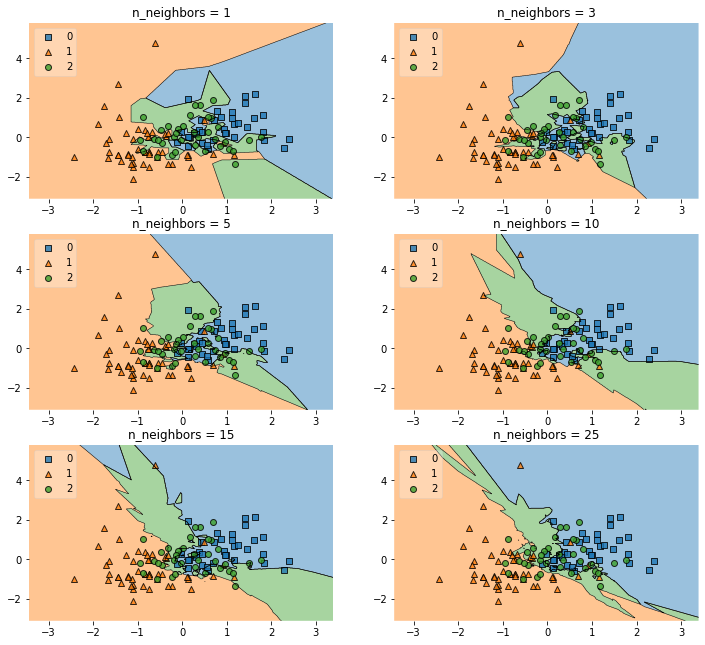

In [227]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(12,11))

X_train_np = X_train.to_numpy()

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in zip([clf_1, clf_2, clf_3, clf_4, clf_5, clf_6],
                         labels,
                         itertools.product([0, 1, 2], [0, 1])):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_np, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

## Вывод:
Исходя из полученных доль правильных ответов в тестовой выборке (задание 1.3) и графиков решающих поверхностей на сетке можно сказать, что оптимальным количеством соседей является 5. Во-первых, именно при 5 соседях доля правильных ответов на тестовой выборке наибольшая, а, во-вторых, график по такому классификатору наиболее точен: здесь нет выбросов синей и красных областей, а также области достаточно гладкие. 

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

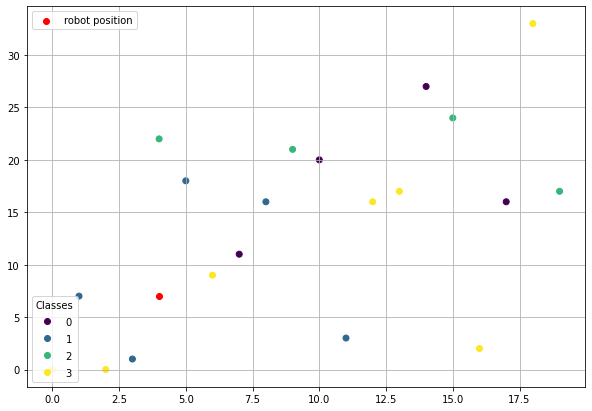

In [238]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [382]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = []
        self.trajectory.append(initial_position)
        
        # kNN Classifier for determining the classes of landmarks      
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        i = np.random.binomial(1, 0.2)
        
        initial_position = self.trajectory[-1]
        
        
        identity = int(self.knn.predict(initial_position.reshape(1, -1)))
        
        if i == 1:
            new_position = initial_position + self.mapping[0]
            
        else:
            new_position = initial_position + self.mapping[identity]

        self.trajectory.append(new_position)
        

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [383]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

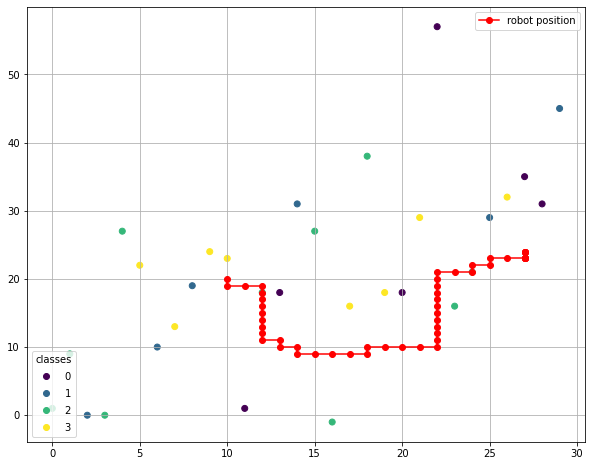

In [384]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

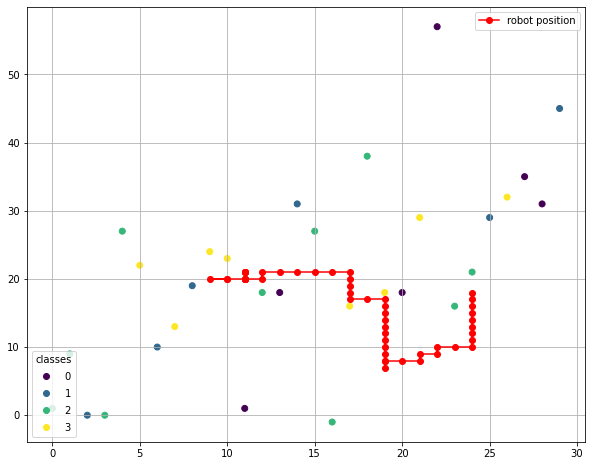

In [385]:
#для 1 соседа
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

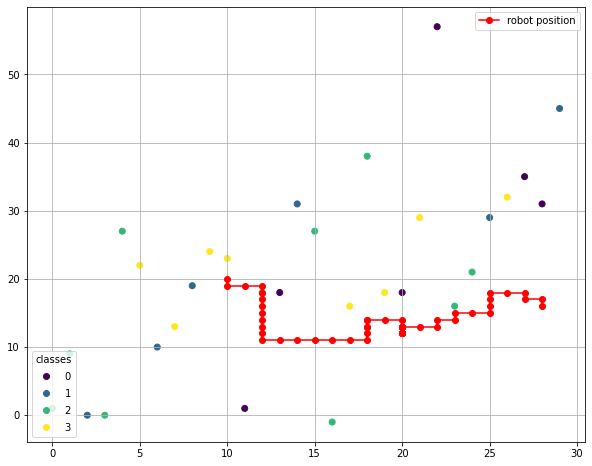

In [386]:
#для 10 соседей
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

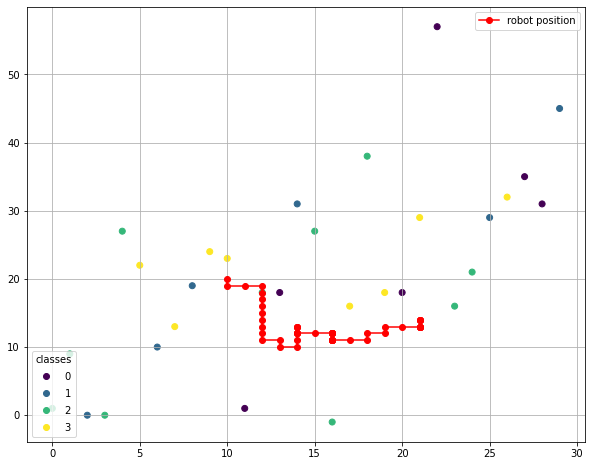

In [387]:
#для 15 соседей
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

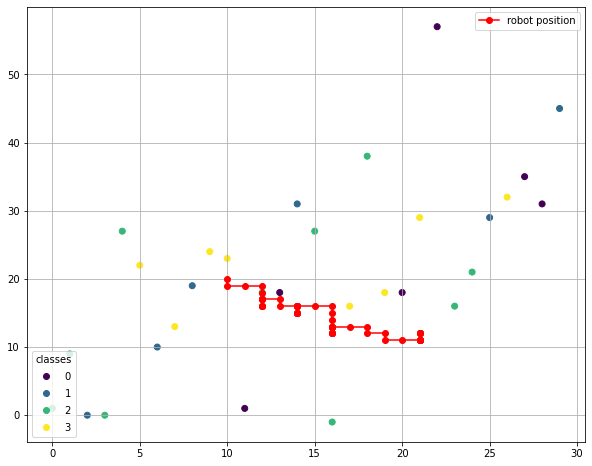

In [390]:
#для 20 соседей
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

## Вывод:
В нашем эксперименте определенной тенденции в изменении движения не наблюдается с ростом/падением числа соседей и робот просто начинает двигаться по-другому. Однако, если расположение меток имело какой-то смысл (например, метки были бы как знаки дорожного движения), то робот двигался бы более равномерным и безопасным способом, поскольку оценивал бы наперед, какие преграды ему стоило бы предусмотреть.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [87]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [89]:
data.isnull().any().any()

False

In [391]:
print("Пропущенных значений нет.")

Пропущенных значений нет.


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [92]:
data = data.drop(['Unnamed: 0'], axis = 1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [94]:
corr_matrix = data.corr()
print(corr_matrix['price'])

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


## Вывод:
Значит, с целевой переменной (ценой) больше всего коррелируют такие признаки, как 'carat', 'x', 'y', 'z'.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [97]:
y = data['price']
X = data.drop(['price'], axis = 1)
X= pd.get_dummies(X, drop_first=True)
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('X_train: \n', X_train, '\n\n', 'X_test: \n', X_test, '\n\n', 'y_train: \n', y_train, '\n\n', 'y_test: \n', y_test, sep='')

X_train: 
       carat  depth  table     x     y     z  cut_Good  cut_Ideal  \
30083   0.32   61.5   56.0  4.42  4.40  2.71         0          1   
21864   1.54   62.8   58.0  7.35  7.32  4.61         0          0   
3761    0.71   62.1   56.0  5.69  5.75  3.55         0          1   
21262   1.03   62.0   56.0  6.48  6.45  4.01         0          1   
15460   1.33   62.4   55.0  7.02  7.05  4.39         0          1   
...      ...    ...    ...   ...   ...   ...       ...        ...   
50057   0.70   62.8   59.0  5.56  5.61  3.51         0          0   
32511   0.40   63.9   57.0  4.71  4.65  2.99         1          0   
5192    0.91   62.7   63.0  6.05  6.00  3.78         0          0   
12172   1.18   61.7   56.0  6.79  6.82  4.20         0          1   
33003   0.32   60.9   56.0  4.41  4.43  2.69         0          1   

       cut_Premium  cut_Very Good  ...  color_H  color_I  color_J  clarity_IF  \
30083            0              0  ...        0        1        0           0   

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [192]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_real_norm_np_train = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_real_norm_np_train)

X_real_norm_np_test = normalizer.fit_transform(X_test)
X_test = pd.DataFrame(data=X_real_norm_np_test)

In [193]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.001137,-0.168798,-0.651778,-1.160324,-1.149215,-1.159324,-0.313354,1.223340,-0.587076,-0.537811,...,-0.42545,2.976753,-0.232729,-0.186867,-0.563383,-0.452151,-0.424060,-0.543374,-0.271772,3.125135
1,1.552917,0.738338,0.244153,1.435896,1.367045,1.501926,-0.313354,-0.817434,1.703357,-0.537811,...,-0.42545,-0.335936,-0.232729,-0.186867,1.774993,-0.452151,-0.424060,-0.543374,-0.271772,-0.319986
2,-0.184677,0.249880,-0.651778,-0.035000,0.014125,0.017228,-0.313354,1.223340,-0.587076,-0.537811,...,-0.42545,-0.335936,-0.232729,-0.186867,-0.563383,-0.452151,2.358157,-0.543374,-0.271772,-0.319986
3,0.485239,0.180101,-0.651778,0.665005,0.617338,0.661531,-0.313354,1.223340,-0.587076,-0.537811,...,-0.42545,-0.335936,-0.232729,-0.186867,-0.563383,-0.452151,-0.424060,-0.543374,-0.271772,3.125135
4,1.113285,0.459219,-1.099744,1.143489,1.134377,1.193781,-0.313354,1.223340,-0.587076,-0.537811,...,-0.42545,-0.335936,4.296846,-0.186867,-0.563383,-0.452151,2.358157,-0.543374,-0.271772,-0.319986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.205612,0.738338,0.692118,-0.150191,-0.106518,-0.038798,-0.313354,-0.817434,-0.587076,1.859388,...,-0.42545,2.976753,-0.232729,-0.186867,-0.563383,-0.452151,-0.424060,1.840352,-0.271772,-0.319986
37754,-0.833658,1.505914,-0.203813,-0.903360,-0.933781,-0.767140,3.191276,-0.817434,-0.587076,-0.537811,...,-0.42545,-0.335936,-0.232729,-0.186867,-0.563383,2.211652,-0.424060,-0.543374,-0.271772,-0.319986
37755,0.234021,0.668558,2.483980,0.283990,0.229558,0.339380,-0.313354,-0.817434,-0.587076,1.859388,...,-0.42545,-0.335936,-0.232729,-0.186867,-0.563383,-0.452151,-0.424060,1.840352,-0.271772,-0.319986
37756,0.799262,-0.029238,-0.651778,0.939690,0.936179,0.927656,-0.313354,1.223340,-0.587076,-0.537811,...,-0.42545,-0.335936,4.296846,-0.186867,-0.563383,-0.452151,2.358157,-0.543374,-0.271772,-0.319986


In [194]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.004203,-0.046749,-1.099514,-1.180292,-1.162544,-1.167798,-0.323145,1.231997,-0.583773,-0.535956,...,2.330039,-0.330442,-0.238076,-0.181487,1.754459,-0.455941,-0.418933,-0.539775,-0.26449,-0.326516
1,0.865390,0.232708,-0.206450,0.945098,0.886328,0.945807,-0.323145,1.231997,-0.583773,-0.535956,...,-0.429177,3.026251,-0.238076,-0.181487,-0.569976,-0.455941,-0.418933,1.852623,-0.26449,-0.326516
2,-0.381005,-0.535798,-0.206450,-0.203517,-0.179085,-0.249473,-0.323145,1.231997,-0.583773,-0.535956,...,-0.429177,-0.330442,-0.238076,-0.181487,-0.569976,-0.455941,2.387016,-0.539775,-0.26449,-0.326516
3,-0.982713,0.931350,-0.652982,-1.198381,-1.162544,-1.080339,3.094587,-0.811691,-0.583773,-0.535956,...,2.330039,-0.330442,-0.238076,-0.181487,-0.569976,-0.455941,-0.418933,1.852623,-0.26449,-0.326516
4,0.865390,0.512165,-1.099514,0.936054,1.004707,1.033267,-0.323145,1.231997,-0.583773,-0.535956,...,-0.429177,-0.330442,-0.238076,-0.181487,-0.569976,2.193265,-0.418933,-0.539775,-0.26449,-0.326516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,-0.939734,-1.653626,-0.652982,-0.927054,-0.953104,-1.094915,-0.323145,-0.811691,1.712996,-0.535956,...,-0.429177,-0.330442,-0.238076,-0.181487,-0.569976,-0.455941,-0.418933,1.852623,-0.26449,-0.326516
16178,0.091766,-0.046749,-0.652982,0.266782,0.303538,0.289861,-0.323145,-0.811691,-0.583773,1.865826,...,-0.429177,3.026251,-0.238076,-0.181487,-0.569976,-0.455941,-0.418933,-0.539775,-0.26449,3.062635
16179,-1.047182,-0.675527,-0.206450,-1.216469,-1.253605,-1.284411,-0.323145,1.231997,-0.583773,-0.535956,...,-0.429177,-0.330442,-0.238076,-0.181487,-0.569976,-0.455941,-0.418933,1.852623,-0.26449,-0.326516
16180,-1.025692,0.442301,-0.652982,-1.216469,-1.189862,-1.153222,-0.323145,1.231997,-0.583773,-0.535956,...,-0.429177,-0.330442,-0.238076,-0.181487,-0.569976,-0.455941,-0.418933,-0.539775,-0.26449,3.062635


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [195]:
lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [196]:
from sklearn.linear_model import LinearRegression
def MSE(y: np.array, y_pred: np.array):
    return  1/ len(y) * np.sum((y - y_pred) ** 2)

mse_train = MSE(y=y_train, y_pred=y_pred_train)
mse_test = MSE(y=y_test, y_pred=y_pred_test)
print("The Mean Square Error for train sample is: " , mse_train, '\n', "The Mean Square Error for test sample is: " , mse_test)

The Mean Square Error for train sample is:  1310118.7779581894 
 The Mean Square Error for test sample is:  1213961.7592838667


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [346]:
coefs_bad = reg.coef_
coefs_bad = coefs_bad[:6]

coefs = []

for i in coefs_bad:
    
    coefs.append(float('{:.3f}'.format(i)))
    
coefs

[5277.247, -83.586, -56.87, -1050.102, -0.654, -12.889]

In [199]:
cols = X.columns.to_list()
cols

['carat',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [350]:
print(cols[0], ', ', cols[3],  sep = '')

carat, x


In [351]:
print('Переменные с наибольшими оценками коэффициентов: ', cols[0], ', ', cols[3], '.', sep = '')

Переменные с наибольшими оценками коэффициентов: carat, x.


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [202]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso.coef_

array([4783.41094049,  -88.18838824,  -67.34812205, -605.4571011 ,
         -0.        ,   -9.04245448,   45.90699967,  207.92331741,
        150.09822521,  139.4370833 ,  -12.65867611,  -35.62012708,
       -122.72563295, -284.88080225, -369.04859265, -467.2452535 ,
        669.45958233,  863.02801363,  409.79199968, 1053.42448122,
       1102.04028249,  852.95943422,  958.90274725])

In [203]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.23973797e+03, -8.18029757e+01, -5.70570935e+01, -1.00923042e+03,
       -2.55973659e+00, -1.64756784e+01,  1.72041187e+02,  4.17140870e+02,
        3.40412927e+02,  3.14372969e+02, -8.41350398e+01, -1.02177926e+02,
       -1.99692501e+02, -3.56285462e+02, -4.39199150e+02, -5.24544818e+02,
        9.74870405e+02,  1.56782640e+03,  1.02157962e+03,  1.65263349e+03,
        1.79332538e+03,  1.27483844e+03,  1.44104250e+03])

## Вывод:
Веса поменялись несильно, значит, проблема мультиколлинеарности слабо проявлялась в изначальной регрессии.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

Text(0, 0.5, 'Евклидовы нормы весов')

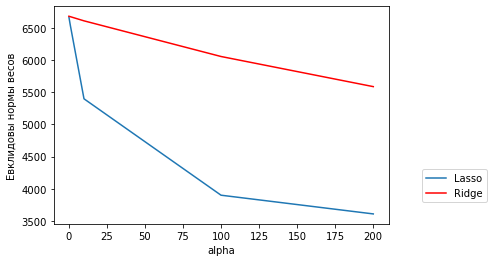

In [204]:
grid = np.linspace(0, 6000)

alphas = [0.1, 1, 10, 100, 200]

coefs_l_norms = []
coefs_r_norms = []

for n in alphas:
    lasso = linear_model.Lasso(alpha=n)
    lasso.fit(X_train, y_train)
    coefs_l = lasso.coef_
    coefs_l_norm = np.linalg.norm(coefs_l)
    coefs_l_norms.append(coefs_l_norm)
    
    ridge = linear_model.Ridge(alpha=n)
    ridge.fit(X_train, y_train)
    coefs_r = ridge.coef_
    coefs_r_norm = np.linalg.norm(coefs_r)
    coefs_r_norms.append(coefs_r_norm)
    #plt.plot(grid, coefs_norm, linewidth=0.5, label="alpha = "+str(n))
   
    
plt.plot(alphas, coefs_l_norms, label="Lasso")
plt.plot(alphas, coefs_r_norms, c='r', label="Ridge")
plt.legend(loc=(1.1, 0.1))
plt.xlabel("alpha")
plt.ylabel("Евклидовы нормы весов")

## Вывод:
Lasso сильнее урезает веса по сравнению с Ridge. Lasso используют чаще, поскольку, в отличие от Ridge, оно зануляет некоторые коэффициенты при возрастании alpha, которые вносят меньший вклад, что, в итоге, облегчает интерпретацию полученных результатов (источник: http://repo.ssau.ru/bitstream/Informacionnye-tehnologii-i-nanotehnologii/Sravnenie-metodov-Ridzhregressii-i-LASSO-v-zadachah-obrabotki-dannyh-64145/1/paper%20315_1748-1755.pdf). 

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [205]:
# получим матрицу ошибок
from sklearn.linear_model import LassoCV
lassocv = linear_model.LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5)
lassocv.fit(X_train, y_train)
lassocv_alphas = lassocv.alphas_
matrix = lassocv.mse_path_
matrix

array([[2153924.65116764, 2300465.10368379, 2046789.87123468,
        2276627.24602573, 2191163.69140014],
       [1795264.92688306, 1904172.20352478, 1679007.06242892,
        1898344.19800727, 1806704.07390437],
       [1375385.99685085, 1447421.05179223, 1266518.22771875,
        1426557.65373946, 1351245.5076114 ],
       [1318181.98248042, 1399335.57938196, 1220557.83364116,
        1349907.61728408, 1280966.54135063],
       [1317495.88843598, 1400875.96554462, 1221853.55871723,
        1347811.0892046 , 1279377.83500951]])

In [206]:
#найдем порядок альф
lassocv_alphas
alphas = []
for i in lassocv_alphas:
    
    alphas.append(float('{:.3f}'.format(i)))
    
alphas

[200.0, 100.0, 10.0, 1.0, 0.1]

In [207]:
# оперделим наиболее оптимальное альфа
np.mean(matrix, axis=1)

array([2193794.1127024 , 1816698.49294968, 1373425.68754254,
       1313789.91082765, 1313482.86738239])

## Вывод:
Таким образом, наименьшая ошибка у последней строки, соответствующей альфа = 0.1.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [208]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
coefs_l = lasso.coef_
coefs_l

array([ 5.27228896e+03, -8.36218371e+01, -5.69712234e+01, -1.04597116e+03,
       -2.55505565e-01, -1.29008400e+01,  1.70254751e+02,  4.13961241e+02,
        3.37611814e+02,  3.11407517e+02, -8.38762556e+01, -1.01723281e+02,
       -1.99469012e+02, -3.56422884e+02, -4.39759495e+02, -5.25249224e+02,
        9.84378233e+02,  1.59121162e+03,  1.04134619e+03,  1.67216946e+03,
        1.81606318e+03,  1.28820847e+03,  1.45657763e+03])

## Вывод:
Таким образом, наиболее информативными признаками являются carat, clarity, поскольку у них наибольшие коэффициенты. 
Так происходит, поскольку цена бриллиантов больше всего зависит от карат (чем больше карат, тем всегда цена выше, о чем и говорят полученные результаты, где коэффициент у каратов гораздо больше остальных), а также от чистоты самого камня (аналогично каратам, цена всегда выше, чем более чистый камень). Причиной повышения цен является возрастающая редкость камня с более высокими параметрами карат и чистоты.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [209]:
y_lasso = lasso.predict(X_test)
mse_test_lasso = MSE(y=y_test, y_pred=y_lasso)
print("The Mean Square Error for Lasso regression is:" , mse_test_lasso)

The Mean Square Error for Lasso regression is: 1213885.3469148527


In [210]:
mse_test_lasso < mse_test

True

## Вывод:
Среднеквадрнатическое отклонение у Lasso-регрессии меньше, чем у обычной линейной регрессии, а значит, лучше использовать Lasso. 
Ошибка могла стать меньше у Lasso за счет того, что в данной регрессии уменьшается влияние мультиколлинеарности, которое возникло при перекодировке категориальных признаков. Влияние наименее значимых признаков частично нивелировалось, что позволило получить лучшие результаты, чем у обычной линейной регрессии. 